## Predictions Using Unsupervised ML

In this task we are given an ‘Iris’ dataset, from which we have to predict the optimum number of clusters and
represent it visually.

In [9]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets

# Load the iris dataset
iris = datasets.load_iris()
iris_df = pd.DataFrame(iris.data, columns = iris.feature_names)
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


<AxesSubplot:xlabel='petal length (cm)', ylabel='petal width (cm)'>

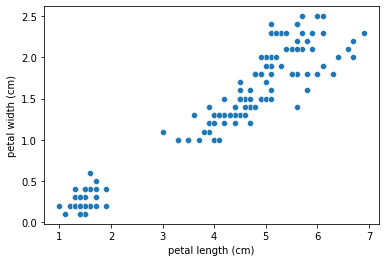

In [18]:
import seaborn as sns
#sns.pairplot(iris_df)
sns.scatterplot(x = "petal length (cm)",y = "petal width (cm)",data=iris_df)

<AxesSubplot:xlabel='sepal length (cm)', ylabel='sepal width (cm)'>

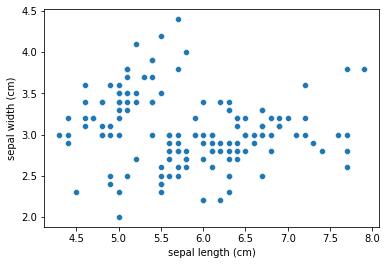

In [19]:
#sns.pairplot(iris_df)
sns.scatterplot(x = "sepal length (cm)",y = "sepal width (cm)",data=iris_df)

In [20]:
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


## Finding optimal number of clusters

In [25]:
#Finding optimal number of clusters
x = iris_df.iloc[:, [0, 1, 2, 3]].values

from sklearn.cluster import KMeans
esse = []

for i in range(1, 11):
    km = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
    km.fit(x)
    esse.append(km.inertia_)
   
esse

[681.3705999999996,
 152.34795176035797,
 78.851441426146,
 57.25600931571815,
 46.44618205128204,
 39.03998724608725,
 34.299712121212146,
 30.014398496240617,
 28.03690635345049,
 26.534529220779234]

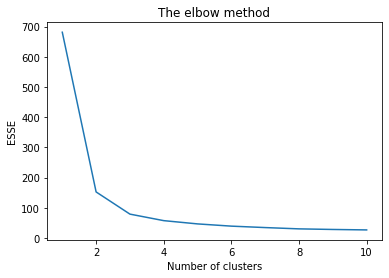

In [26]:
#Elbow plot
plt.plot(range(1, 11), esse)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('ESSE') # Within cluster sum of squares
plt.show()

## Training the model and visualizing the result

In [27]:
# Applying kmeans to the dataset / Creating the kmeans classifier
km = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
y_pred = km.fit_predict(x)

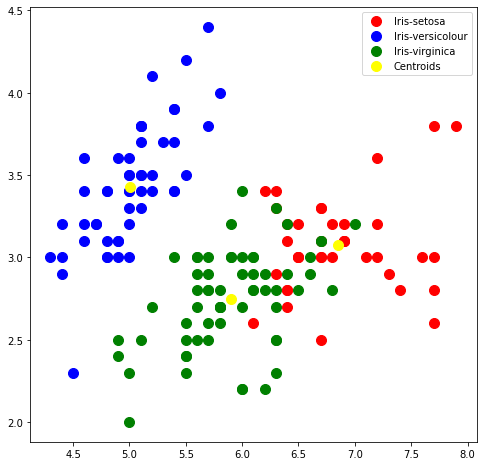

In [28]:
# Visualising the clusters - On the first two columns
plt.figure(figsize=(8,8))
plt.scatter(x[y_pred == 0, 0], x[y_pred == 0, 1], 
            s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_pred == 1, 0], x[y_pred == 1, 1], 
            s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_pred == 2, 0], x[y_pred == 2, 1],
            s = 100, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')

plt.legend()